In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def load_image_rgb(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)
        img = img / 255.0
        return img
    else:
        print(f"Image non trouvée ou illisible : {image_path}")
        return None

In [3]:
model = tf.keras.models.load_model('pencil_sketch_model.keras')

test_folder = 'data/RGB_Faces_test'
image_files = sorted([f for f in os.listdir(test_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

In [4]:
test_images = []
for f in image_files[:4]:
    img = load_image_rgb(os.path.join(test_folder, f))
    if img is not None:
        test_images.append(img)

test_images = np.array(test_images)
print(f"Test images chargées : {test_images.shape}")

predicted_sketches = model.predict(test_images)

Test images chargées : (4, 224, 224, 3)
1/1 [==============================] - 0s 156ms/step


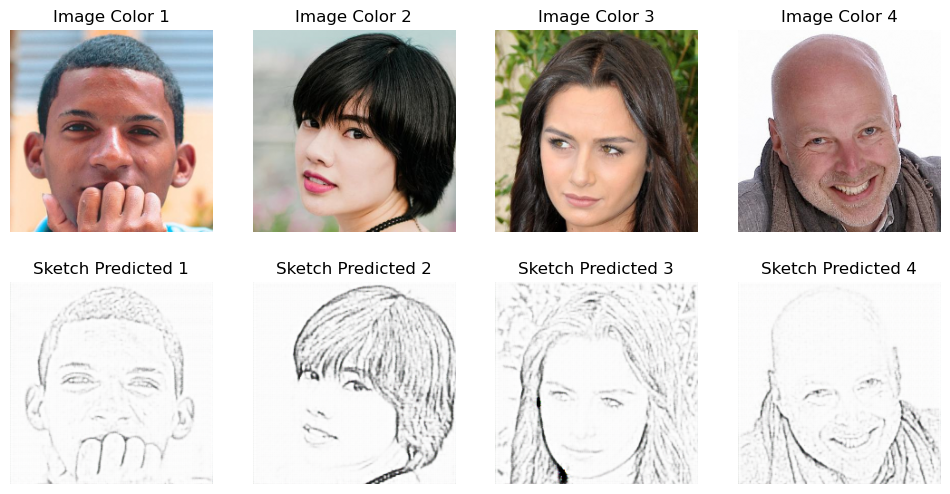

In [6]:
plt.figure(figsize=(12, 6))
for i in range(len(test_images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Image Color {i+1}")
    plt.axis('off')
    plt.subplot(2, 4, i + 5)
    plt.imshow(predicted_sketches[i])
    plt.title(f"Sketch Predicted {i+1}")
    plt.axis('off')
plt.show()